# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [7]:
import re
import csv

# Step 1: Read the dataset
def read_dataset(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Step 2: Tokenize the text into words
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Step 3: Generate N-grams
def generate_ngrams(tokens, n):
    ngrams = []
    for i in range(len(tokens) - n + 1):
        ngrams.append(tuple(tokens[i:i+n]))
    return ngrams

# Step 4: Count the frequency of N-grams
def count_ngrams(ngrams):
    frequency = {}
    for gram in ngrams:
        if gram in frequency:
            frequency[gram] += 1
        else:
            frequency[gram] = 1
    return frequency

# Step 5: Calculate probabilities for bigrams
def calculate_bigram_probabilities(text):
    tokens = tokenize(text)
    bigrams = generate_ngrams(tokens, 2)
    frequency = count_ngrams(bigrams)
    probabilities = {}
    for bigram, count in frequency.items():
        word1 = bigram[1]
        if word1 in probabilities:
            probabilities[word1][bigram] = count
        else:
            probabilities[word1] = {bigram: count}
    for word, bigram_counts in probabilities.items():
        total_count = sum(bigram_counts.values())
        for bigram in bigram_counts:
            probabilities[word][bigram] /= total_count
    return probabilities

# Step 6: Extract noun phrases
def extract_noun_phrases(text):
    # Dummy function, you need to implement your own noun phrase extraction logic
    # For example, you can use NLTK library for this task
    # Here, I'm just returning a list of words as noun phrases
    return tokenize(text)

# Step 7: Calculate relative probabilities of each review in terms of other reviews
def calculate_relative_probabilities(dataset):
    reviews = dataset.split('\n')
    noun_phrases = set()
    review_noun_phrases = {}
    for review in reviews:
        phrases = extract_noun_phrases(review)
        for phrase in phrases:
            noun_phrases.add(phrase)
            if phrase in review_noun_phrases:
                review_noun_phrases[phrase].append(review)
            else:
                review_noun_phrases[phrase] = [review]

    max_frequency = {phrase: max(len(reviews) for reviews in review_noun_phrases.values()) for phrase in noun_phrases}
    relative_probabilities = {}
    for phrase, reviews in review_noun_phrases.items():
        relative_probabilities[phrase] = [reviews.count(review) / max_frequency[phrase] for review in reviews]

    return relative_probabilities

# Example usage
if __name__ == "__main__":
    # Read the dataset
    dataset = read_dataset('inception_reviews.csv')

    # Calculate probabilities for bigrams
    bigram_probabilities = calculate_bigram_probabilities(dataset)

    # Calculate relative probabilities of each review in terms of other reviews
    relative_probabilities = calculate_relative_probabilities(dataset)

    # Print results
    print("Bigram Probabilities:")
    for word, probabilities in bigram_probabilities.items():
        print(word, probabilities)

    print("\nRelative Probabilities of Noun Phrases:")
    for phrase, probabilities in relative_probabilities.items():
        print(phrase, probabilities)


Bigram Probabilities:
my {('review', 'my'): 0.0003448275862068965, ('stunned', 'my'): 0.034482758620689655, ('in', 'my'): 0.20689655172413793, ('of', 'my'): 0.20689655172413793, ('is', 'my'): 0.10344827586206896, ('nolan', 'my'): 0.034482758620689655, ('off', 'my'): 0.034482758620689655, ('because', 'my'): 0.034482758620689655, ('hearing', 'my'): 0.034482758620689655, ('oh', 'my'): 0.034482758620689655, ('on', 'my'): 0.06896551724137931, ('keep', 'my'): 0.034482758620689655, ('masterpiece', 'my'): 0.034482758620689655, ('if', 'my'): 0.034482758620689655, ('s', 'my'): 0.06896551724137931, ('c', 'my'): 0.03413793103448276}
3rd {('my', '3rd'): 1.0}
time {('3rd', 'time'): 0.03333333333333333, ('all', 'time'): 0.13333333333333333, ('every', 'time'): 0.06666666666666667, ('life', 'time'): 0.03333333333333333, ('long', 'time'): 0.06666666666666667, ('screen', 'time'): 0.03333333333333333, ('first', 'time'): 0.03333333333333333, ('this', 'time'): 0.06666666666666667, ('a', 'time'): 0.033333333

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.001718213058419244, 0.0017182

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [11]:
import csv
import math

# Function to read the dataset from CSV
def read_dataset(filename):
    documents = []
    with open(filename, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        for row in reader:
            documents.append(row[0])
    return documents

# Preprocess function to tokenize and clean text
def preprocess(text):
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Tokenize by whitespace
    text = [word.strip(",.!?") for word in text]  # Remove punctuation
    return text

# Calculate term frequency (TF)
def calculate_tf(document):
    tf_dict = {}
    total_words = len(document)
    for word in document:
        tf_dict[word] = tf_dict.get(word, 0) + 1 / total_words
    return tf_dict

# Calculate inverse document frequency (IDF)
def calculate_idf(documents):
    idf_dict = {}
    total_documents = len(documents)
    for document in documents:
        unique_words = set(document)
        for word in unique_words:
            idf_dict[word] = idf_dict.get(word, 0) + 1

    for word, count in idf_dict.items():
        idf_dict[word] = math.log(total_documents / count)
    return idf_dict

# Calculate TF-IDF matrix
def calculate_tfidf(documents):
    tfidf_matrix = []
    idf_dict = calculate_idf(documents)
    for document in documents:
        tf_dict = calculate_tf(document)
        tfidf_vector = [tf_dict[word] * idf_dict[word] if word in tf_dict else 0 for word in idf_dict]
        tfidf_matrix.append(tfidf_vector)
    return tfidf_matrix

# Calculate cosine similarity
def cosine_similarity(vector1, vector2):
    dot_product = sum(a * b for a, b in zip(vector1, vector2))
    magnitude1 = math.sqrt(sum(a ** 2 for a in vector1))
    magnitude2 = math.sqrt(sum(b ** 2 for b in vector2))
    if magnitude1 == 0 or magnitude2 == 0:
        return 0
    else:
        return dot_product / (magnitude1 * magnitude2)

# Rank documents based on cosine similarity to the query
def rank_documents(query, documents, tfidf_matrix, idf_dict):
    query_vector = [query.count(word) * idf_dict.get(word, 0) for word in idf_dict]
    similarities = [cosine_similarity(query_vector, document_vector) for document_vector in tfidf_matrix]
    ranked_documents = sorted(zip(range(len(documents)), similarities), key=lambda x: x[1], reverse=True)
    return ranked_documents

# Main function
if __name__ == "__main__":
    # Read the dataset
    dataset_file = "inception_reviews.csv"
    inception_reviews = read_dataset(dataset_file)

    # Preprocess documents and query
    preprocessed_documents = [preprocess(doc) for doc in inception_reviews]
    query = preprocess("An Outstanding movie with a haunting performance and best character development")

    # Calculate TF-IDF matrix
    tfidf_matrix = calculate_tfidf(preprocessed_documents)

    # Calculate IDF dictionary
    idf_dict = calculate_idf(preprocessed_documents)

    # Rank documents based on cosine similarity to the query
    ranked_documents = rank_documents(query, preprocessed_documents, tfidf_matrix, idf_dict)

    # Display ranked documents
    print("Ranked Documents:")
    for rank, (doc_index, similarity) in enumerate(ranked_documents):
        print(f"Rank {rank+1}: Document {doc_index+1} - Similarity: {similarity:.4f}")



Ranked Documents:
Rank 1: Document 16 - Similarity: 0.1050
Rank 2: Document 41 - Similarity: 0.1050
Rank 3: Document 66 - Similarity: 0.1050
Rank 4: Document 91 - Similarity: 0.1050
Rank 5: Document 116 - Similarity: 0.1050
Rank 6: Document 141 - Similarity: 0.1050
Rank 7: Document 166 - Similarity: 0.1050
Rank 8: Document 191 - Similarity: 0.1050
Rank 9: Document 216 - Similarity: 0.1050
Rank 10: Document 241 - Similarity: 0.1050
Rank 11: Document 266 - Similarity: 0.1050
Rank 12: Document 291 - Similarity: 0.1050
Rank 13: Document 316 - Similarity: 0.1050
Rank 14: Document 341 - Similarity: 0.1050
Rank 15: Document 366 - Similarity: 0.1050
Rank 16: Document 391 - Similarity: 0.1050
Rank 17: Document 416 - Similarity: 0.1050
Rank 18: Document 441 - Similarity: 0.1050
Rank 19: Document 466 - Similarity: 0.1050
Rank 20: Document 491 - Similarity: 0.1050
Rank 21: Document 516 - Similarity: 0.1050
Rank 22: Document 541 - Similarity: 0.1050
Rank 23: Document 566 - Similarity: 0.1050
Rank 2

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

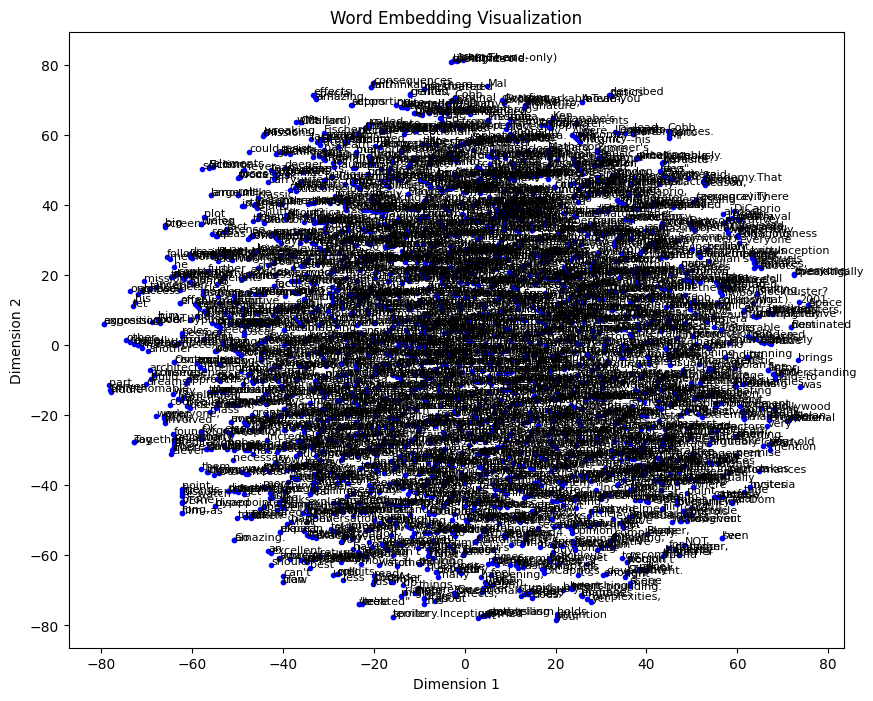

In [19]:
# Write your code herimport pandas as pd
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Load and Preprocess the Data
data = pd.read_csv('inception_reviews.csv')
reviews = data['Review'].tolist()
# Tokenize the reviews (split each review into words)
tokenized_reviews = [review.split() for review in reviews]

# Step 2: Train the Word Embedding Model
embedding_dim = 300
window_size = 5
min_count = 1  # Minimum frequency of a word to be included in the model
model = Word2Vec(sentences=tokenized_reviews, vector_size=embedding_dim, window=window_size, min_count=min_count)

# Step 3: Visualize the Word Embedding Model
# Get the vocabulary (list of unique words in the model)
words = list(model.wv.index_to_key)

# Reduce dimensionality for visualization using t-SNE
tsne = TSNE(n_components=2, random_state=42)
word_vectors = model.wv[words]
word_vectors_2d = tsne.fit_transform(word_vectors)

# Plot the word embeddings
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], marker='.', color='b')

# Add annotations for some words
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=8)
plt.title('Word Embedding Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()








## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [22]:
# The GitHub link of your final csv file



# Link: https://github.com/Keyooralaya/INFO_5737



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [23]:
# Type your answer
'''The task involves leveraging cosine similarity to create document rating systems and TF-IDF (Term Frequency-Inverse Document Frequency) systems without the need for third-party libraries. Developing these algorithms from scratch, guaranteeing computational performance, and debugging without the use of outside validation tools present challenges. Nonetheless, the work provides worthwhile learning experiences that contribute to a more profound comprehension of the fundamentals of natural language processing and the complexities of algorithms. The practical experience acquired from this task improves one's ability to analyse text and retrieve information. Students are forced to solve algorithmic difficulties and optimise code for performance, which cultivates problem-solving skills. Depending on each student's level of ability and knowledge with the material, different amounts of time are needed to do the assignment. Overall, even if it is difficult, this project fosters a deeper grasp of NLP ideas and algorithmic implementation methodologies by providing a satisfying exercise in applying theoretical knowledge to real-world challenges.'''








"The task involves leveraging cosine similarity to create document rating systems and TF-IDF (Term Frequency-Inverse Document Frequency) systems without the need for third-party libraries. Developing these algorithms from scratch, guaranteeing computational performance, and debugging without the use of outside validation tools present challenges. Nonetheless, the work provides worthwhile learning experiences that contribute to a more profound comprehension of the fundamentals of natural language processing and the complexities of algorithms. The practical experience acquired from this task improves one's ability to analyse text and retrieve information. Students are forced to solve algorithmic difficulties and optimise code for performance, which cultivates problem-solving skills. Depending on each student's level of ability and knowledge with the material, different amounts of time are needed to do the assignment. Overall, even if it is difficult, this project fosters a deeper grasp o